# Library Installing 

In [3]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

# 1) Import Dataset 

In [32]:
Bank = pd.read_csv(r"C:\Users\Digambar\OneDrive\Desktop\Imarticus Learing\Machine Learning\Supervised Machie Learning\Ensemble Model\Bank_Loan.csv")
Bank

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,28,Male,Yes,0,Not Graduate,Yes,91473,643710,Yes,631,Urban,Medium,36,No
977,LP002975,46,Male,Yes,2,Graduate,No,82832,191806,Yes,697,Urban,Good,16,No
978,LP002980,40,Male,No,0,Graduate,No,40912,160512,Yes,790,Semiurban,Good,5,No
979,LP002986,31,Male,Yes,4,Graduate,No,77945,817294,Yes,889,Rural,Good,28,Yes


### Checking Rows and Columns 

In [33]:
print ("Rows     : " ,Bank.shape[0])
print ("Columns  : " ,Bank.shape[1])


Rows     :  981
Columns  :  15


In [34]:
Bank.info()  #to chekck informtion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Loan_ID              981 non-null    object
 1   Age                  981 non-null    int64 
 2   Gender               981 non-null    object
 3   Married              981 non-null    object
 4   Dependents           981 non-null    int64 
 5   Education            981 non-null    object
 6   Self_Employed        981 non-null    object
 7   ApplicantIncome      981 non-null    int64 
 8   LoanAmount           981 non-null    int64 
 9   Previous_Loan_Taken  981 non-null    object
 10  Cibil_Score          981 non-null    int64 
 11  Property_Area        981 non-null    object
 12  Customer_Bandwith    981 non-null    object
 13  Tenure               981 non-null    int64 
 14  Loan_Status          981 non-null    object
dtypes: int64(6), object(9)
memory usage: 115.1+ KB


### Missing Value 

In [35]:
Bank.isnull().sum()

Loan_ID                0
Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64

### Removeing Irrelvent Element 

In [37]:
Bank = Bank.drop(['Loan_ID'],axis=1)
Bank.columns

Index(['Age', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Previous_Loan_Taken', 'Cibil_Score',
       'Property_Area', 'Customer_Bandwith', 'Tenure', 'Loan_Status'],
      dtype='object')

In [39]:
# #Employee Numeric columns
Bank_num = Bank[Bank.select_dtypes(include=[np.number]).columns.tolist()]
Bank_num.head(3)

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,43,3,54005,334113,668,43
1,57,2,28817,736026,684,13
2,25,3,99939,712432,788,10


In [40]:
Bank_dummies = Bank[Bank.select_dtypes(include=['object']).columns.tolist()]
Bank_dummies.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,Male,No,Graduate,No,Yes,Urban,Good,No
1,Male,Yes,Graduate,No,Yes,Rural,Good,Yes
2,Male,Yes,Graduate,Yes,Yes,Urban,Good,No


In [41]:
from sklearn.preprocessing import LabelEncoder
Bank_dummies=Bank_dummies.apply(LabelEncoder().fit_transform)
Bank_dummies.head(3)
# label in ascending order

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,1,0,0,0,1,2,1,0
1,1,1,0,0,1,0,1,1
2,1,1,0,1,1,2,1,0


In [42]:
Bank_combined = pd.concat([Bank_num, Bank_dummies],axis=1)
Bank_combined.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,43,3,54005,334113,668,43,1,0,0,0,1,2,1,0
1,57,2,28817,736026,684,13,1,1,0,0,1,0,1,1
2,25,3,99939,712432,788,10,1,1,0,1,1,2,1,0
3,44,1,38470,267161,888,9,1,1,1,0,1,2,1,0
4,58,1,28991,402474,703,11,1,0,0,0,1,2,1,0


# 2) Data Partition 

#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = Bank_combined.drop('Loan_Status',axis=1)
y = Bank_combined[["Loan_Status"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [45]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 784.
The number of samples into the Test data is 197.


# 3) Model 2 -GBM (Gradient boosting) 

## Model 2 -GBM (Gradient boosting) 

In [ ]:
abc=pd.DataFrame(gscv_GBM.cv_results_) abc=abc.loc[:,['param_learning_rate','mean_test_score']] abc.head()

In [53]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [4, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [54]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [4, 5],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [10, 50]},
             scoring='accuracy', verbose=1)

In [55]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 4, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 10}


In [56]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=4, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=10)

In [57]:
# Prediction
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

In [58]:
train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

## Confusion Matrix Train Data (2 Model)

In [59]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       570
           1       0.93      0.79      0.85       214

    accuracy                           0.92       784
   macro avg       0.93      0.88      0.90       784
weighted avg       0.92      0.92      0.92       784



## Confusion Matrix Test Data (2 Model) 

In [60]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       142
           1       0.86      0.80      0.83        55

    accuracy                           0.91       197
   macro avg       0.89      0.88      0.88       197
weighted avg       0.91      0.91      0.91       197



# Importance Feature 

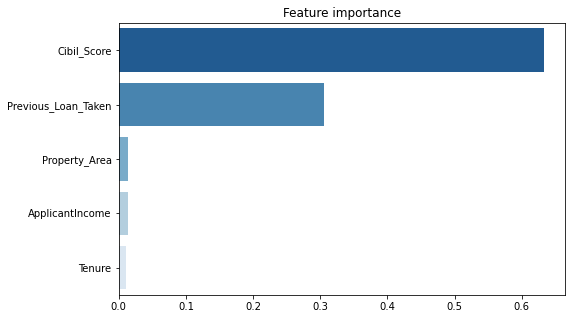

In [61]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# Gradiant Boosting Tree

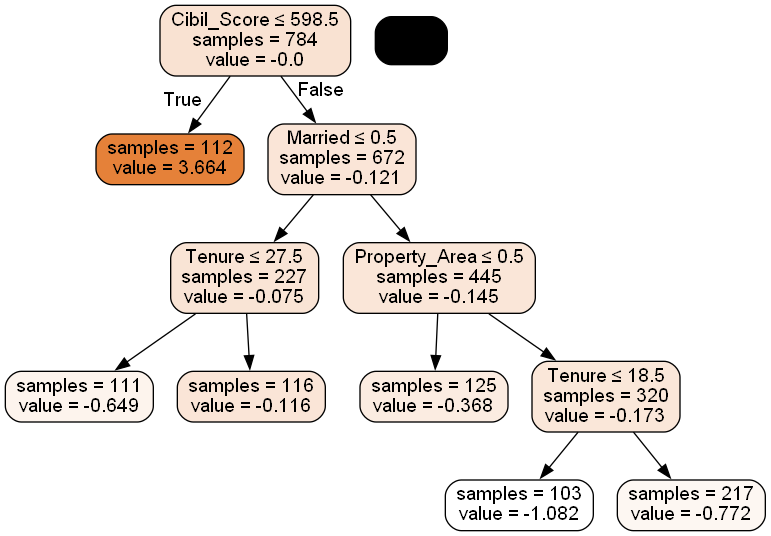

In [62]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[0, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
churn=['Yes','No']
feature_list = list(X.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=churn,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Business Submission